In [1]:
# from __future__ import print_function
from pycocotools.coco import COCO
import sys
import os
import urllib.request
import zipfile
import shutil
import numpy as np
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline

In [2]:
# Record package versions for reproducibility

print("os: %s" % os.name)
print("sys: %s" % sys.version)
print("numpy: %s, %s" % (np.__version__, np.__file__))

print("matplotlib backend: ", matplotlib.get_backend())

notebook_dir = os.path.abspath('')
print("notebook_dir =", notebook_dir)

# project_dir = os.path.abspath(os.path.join(os.path.dirname(notebook_dir), "..", ".."))
# print(project_dir)
# sys.path.insert(0, project_dir)

os: nt
sys: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
numpy: 1.17.4, D:\Software\anaconda3\envs\rnd\lib\site-packages\numpy\__init__.py
matplotlib backend:  module://ipykernel.pylab.backend_inline
notebook_dir = D:\Workspace\git\RnDProject\cocoapi\PythonAPI\demos


In [3]:
# dataDir='..'
# dataType='val2017'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Setup data paths
dataDir = os.path.abspath('../../data/coco')
year = "2017"
dataType = 'val{}'.format(year)

annDir = os.path.join(dataDir, 'annotations')
annZipFile = os.path.join(dataDir, 'annotations_trainval{}.zip'.format(year))
annFile = os.path.join(annDir, 'instances_{}.json'.format(dataType))
annURL = 'http://images.cocodataset.org/annotations/annotations_train{}.zip'.format(dataType)
print(annDir)
print(annFile)
print(annZipFile)
print(annURL)

D:\Workspace\git\RnDProject\cocoapi\data\coco\annotations
D:\Workspace\git\RnDProject\cocoapi\data\coco\annotations\instances_val2017.json
D:\Workspace\git\RnDProject\cocoapi\data\coco\annotations_trainval2017.zip
http://images.cocodataset.org/annotations/annotations_trainval2017.zip


In [4]:
# # Download data if not available locally
# if not os.path.exists(annDir):
#     os.makedirs(annDir)
# if not os.path.exists(annFile):
#     if not os.path.exists(annZipFile):
#         print ("Downloading zipped annotations to " + annZipFile + " ...")
#         with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
#             shutil.copyfileobj(resp, out)
#         print ("... done downloading.")
#     print ("Unzipping " + annZipFile)
#     with zipfile.ZipFile(annZipFile,"r") as zip_ref:
#         zip_ref.extractall(dataDir)
#     print ("... done unzipping")
# print ("Will use annotations in " + annFile)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
animal food person furniture outdoor appliance sports indoor vehicle kitchen accessory electronic


In [7]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

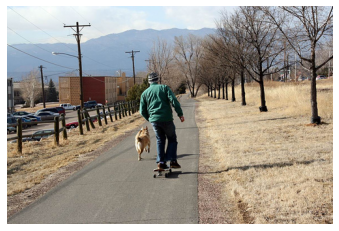

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

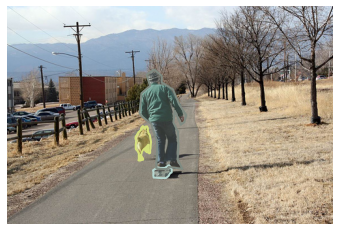

In [9]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [10]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


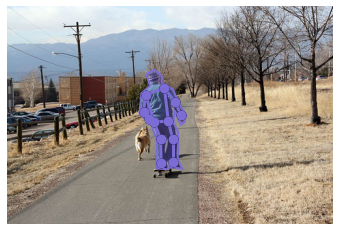

In [11]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [12]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


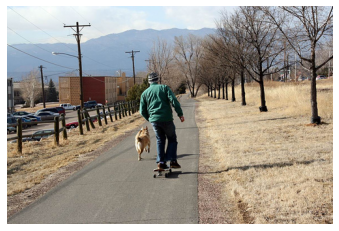

In [13]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()